In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dataset_path = 'E:\\Img_datasets\\dog vs cat\\dataset3\\training_set'
test_dataset_path = 'E:\\Img_datasets\\dog vs cat\\dataset3\\test_set'

In [5]:
BATCH_SIZE = 32
IMG_SHAPE = (256,256,3)

print(f"Batch Size: {BATCH_SIZE}")
print(f"Image Shape: {IMG_SHAPE}")

Batch Size: 32
Image Shape: (256, 256, 3)


In [6]:
train_datagen = ImageDataGenerator(zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  vertical_flip = True)

train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size = (256,256),
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'binary',
                                                   subset = 'training')

Found 1000 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(width_shift_range = 0.01)
test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                        target_size = (256,256),
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'binary')

Found 240 images belonging to 2 classes.


In [8]:
labels = {value: key for key, value in train_generator.class_indices.items()}
print(labels)

{0: 'cats', 1: 'dogs'}


In [9]:
# train_generator[0][0] - image pixels
# train_generator[0][1] - label for the images - (0:cats,1:dog)

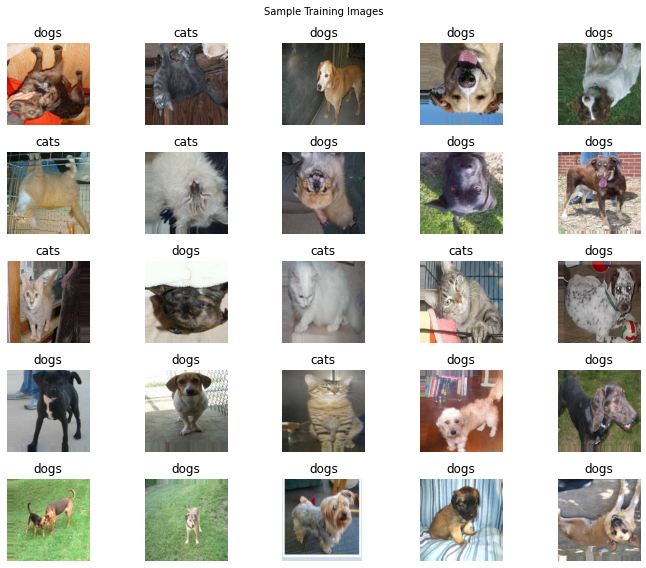

In [10]:
fig, ax = plt.subplots(5, 5, figsize = (10, 8))
idx = 0
plt.suptitle("Sample Training Images", fontsize = 10)
for i in range(5):
    for j in range(5):
        label = labels[train_generator[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx].astype('int'))
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.show()

In [11]:
print(train_generator.image_shape)

(256, 256, 3)


In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense,Flatten, Dropout,Conv2D, MaxPooling2D

In [13]:
m1 = Sequential()
m1.add(Conv2D(16,(3, 3), activation = 'relu', input_shape = train_generator.image_shape))
m1.add(MaxPooling2D(pool_size = (2, 2)))

m1.add(Conv2D(32, (3, 3), activation = 'relu'))
m1.add(MaxPooling2D(pool_size = (2, 2)))

m1.add(Conv2D(64, (3, 3), activation = 'relu'))
m1.add(MaxPooling2D(pool_size = (2, 2)))

m1.add(Conv2D(128, (3, 3), activation = 'relu'))
m1.add(MaxPooling2D(pool_size = (2, 2)))
m1.add(Dropout(rate = 0.15))

m1.add(Flatten())

m1.add(Dense(32, activation = 'relu'))
m1.add(Dense(16, activation = 'relu'))

m1.add(Dense(units = len(set(train_generator.classes)), activation = 'softmax'))

m1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
print(16*(3*3*3) +16)
print(32*(16*3*3) +32)
print(64*(32*3*3) +64)
print(128*(64*3*3) +128)
print(32*25088 + 32)
print(16*32 + 16)
print(2*16 +2)

448
4640
18496
73856
802848
528
34


In [14]:
m1.summary()
# 16*(3*3*3) + 16

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

#### Early Stopping
It checks if the montitored parametes(usually val_loss) is getting reduced for patience number of epochs. If not the Forward and backward propagation will no longer continue

Patience is the number of epochs to check if the val_loss is getting reduced.

In [121]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',patience=3)

In [122]:
h1 = m1.fit(train_generator,validation_data=test_generator,epochs=10,callbacks=[es])

Epoch 1/10
32/32 [==============================] - 80s 2s/step - loss: 4.6857 - accuracy: 0.4960 - val_loss: 0.6897 - val_accuracy: 0.5208
Epoch 2/10
32/32 [==============================] - 75s 2s/step - loss: 0.6909 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5250
Epoch 3/10
32/32 [==============================] - 84s 3s/step - loss: 0.6864 - accuracy: 0.5460 - val_loss: 0.6954 - val_accuracy: 0.4958
Epoch 4/10
32/32 [==============================] - 86s 3s/step - loss: 0.6832 - accuracy: 0.5710 - val_loss: 0.7241 - val_accuracy: 0.5333


In [123]:
m1.save('dog_cat_7Aug.h5')

In [124]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,4.685697,0.496,0.689681,0.520833,0
1,0.690924,0.494,0.693201,0.525000,1
2,0.686396,0.546,0.695391,0.495833,2
3,0.683185,0.571,0.724129,0.533333,3


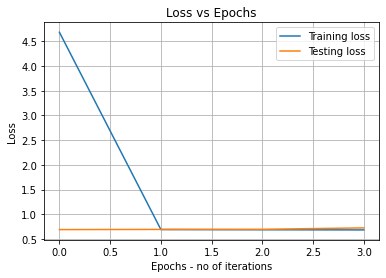

In [125]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

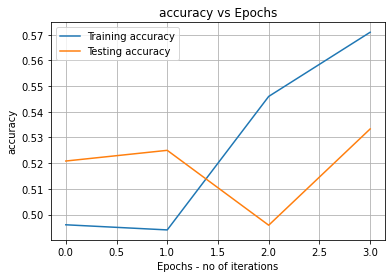

In [126]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [127]:
pred = m1.predict(test_generator)
print(pred)

[[0.46162206 0.53837794]
 [0.4779812  0.5220188 ]
 [0.49521184 0.5047881 ]
 [0.4903661  0.5096339 ]
 [0.4754193  0.52458066]
 [0.45793122 0.5420687 ]
 [0.46562344 0.5343766 ]
 [0.5489814  0.45101857]
 [0.4912052  0.5087947 ]
 [0.4206098  0.57939017]
 [0.60098726 0.39901277]
 [0.30020064 0.69979936]
 [0.21770623 0.78229374]
 [0.44862136 0.55137867]
 [0.23533598 0.76466405]
 [0.4188632  0.58113676]
 [0.34903428 0.6509657 ]
 [0.27230972 0.7276903 ]
 [0.37176883 0.6282311 ]
 [0.4343112  0.5656888 ]
 [0.4778268  0.5221731 ]
 [0.5269998  0.47300023]
 [0.34985775 0.6501423 ]
 [0.03092858 0.96907145]
 [0.49107793 0.50892204]
 [0.35403755 0.6459625 ]
 [0.10388972 0.89611036]
 [0.43020707 0.5697929 ]
 [0.44776618 0.5522338 ]
 [0.50869757 0.4913024 ]
 [0.49993747 0.5000625 ]
 [0.10244796 0.8975521 ]
 [0.50223047 0.49776956]
 [0.47265407 0.52734596]
 [0.17996864 0.8200314 ]
 [0.45382863 0.54617137]
 [0.29142642 0.7085736 ]
 [0.45073128 0.5492687 ]
 [0.46427315 0.53572685]
 [0.3738131  0.6261869 ]


In [128]:
ypred_m1 = [np.argmax(i) for i in pred]
print(ypred_m1)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]


In [139]:
# np.round(pred.T[0])
# [0.46162206, 0.53837794],
#        [0.4779812 , 0.5220188 ],
#        [0.49521184, 0.5047881 ]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

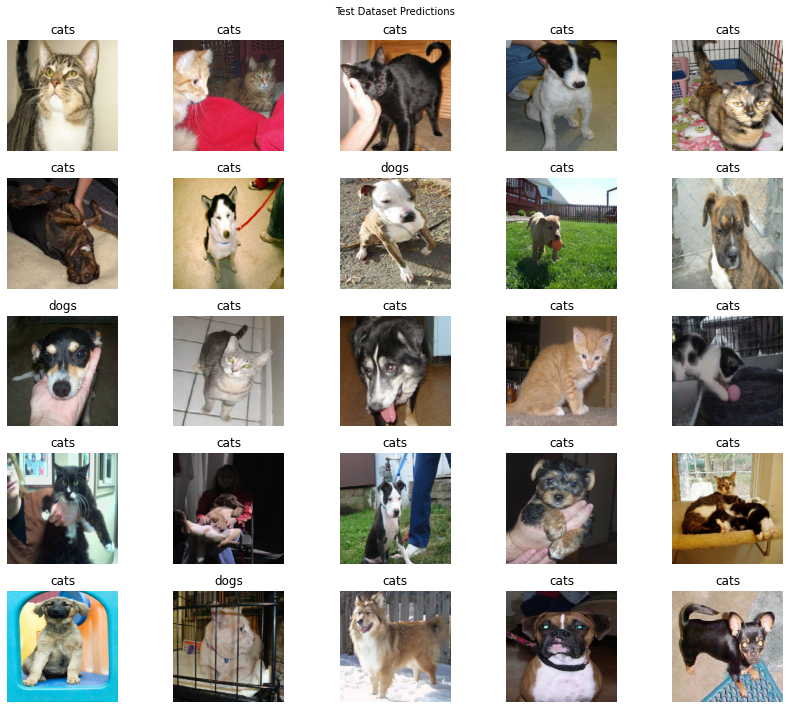

In [140]:
fig, ax = plt.subplots(5,5, figsize=(12, 10))
idx = 0
plt.suptitle('Test Dataset Predictions', fontsize=10)

for i in range(5):
    for j in range(5):
        predicted_label = labels[np.round(pred.T[0][idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx].astype('int'))
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.show()

In [141]:
y_test = test_generator.classes
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 18 102]
 [ 25  95]]
              precision    recall  f1-score   support

           0       0.42      0.15      0.22       120
           1       0.48      0.79      0.60       120

    accuracy                           0.47       240
   macro avg       0.45      0.47      0.41       240
weighted avg       0.45      0.47      0.41       240



#### How to improve model's Performace?
1) Changing the units in Conv2D<br>
2) Increasing the number of epochs<br>
3) Training with more images<br>
4) Experimenting model without Data Augmentation<br>
5) Adding/Removing more Conv2D + Pooling layers<br>
6) Using Transfer Learning Approaches - VGG, MobileNet, Inception etc<br>